<div class="alert">
<div style="direction:ltr;text-align:center;font-family: B Tahoma; font-size:24pt"> Practical Deep Learning Course for Computer Vision
</div>
</div>

<div class="alert">
<div style="direction:ltr;text-align:left;font-family:Tahoma; font-size:16pt"> Overfitting
</div>
</div>

<img src="./images/overfitting.png" alt="Overfitting">
<a href="https://miro.medium.com/max/2400/1*UCd6KrmBxpzUpWt3bnoKEA.png">Reference</a>

<div style="direction:ltr;text-align:left;font-family: Tahoma">
In order to install required libraries, execute cell below.
</div>

In [ ]:
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install opencv-python
!pip install scikit-learn
!pip install tensorflow
!pip install pillow
!pip install h5py
!pip install keras

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Import the required libraries.<br>
</div>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
import keras

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) 

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Setting seed for reproducibility:
</div>

In [2]:
# Seed value
seed_value= 123

# 1. Set the PYTHONHASHSEED environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the python built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the numpy pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the tensorflow pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_random_seed(seed_value)

# 5. Configure a new global tensorflow session
from keras import backend as K
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

<div style="direction:ltr;text-align:left;font-family: Tahoma">
The function to load the preprocessed dataset:<br>
</div>

In [3]:
def load_hoda(dataset_dir, training_sample_size=1000, test_sample_size=200, size=5):
    # Load the dataset
    trs = training_sample_size
    tes = test_sample_size
    dataset = io.loadmat(dataset_dir)

    # Split training and test set
    X_train_orginal = np.squeeze(dataset['Data'][:trs])
    y_train = np.squeeze(dataset['labels'][:trs])
    X_test_original = np.squeeze(dataset['Data'][trs:trs+tes])
    y_test = np.squeeze(dataset['labels'][trs:trs+tes])

    # Resize the dataset
    X_train_5by5 = [cv2.resize(img, dsize=(size, size)) for img in X_train_orginal]
    X_test_5by_5 = [cv2.resize(img, dsize=(size, size)) for img in X_test_original]
    
    # Reshape the dataset
    X_train = [x.reshape(size*size) for x in X_train_5by5]
    X_test = [x.reshape(size*size) for x in X_test_5by_5]
    
    return X_train, y_train, X_test, y_test

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Loading and preprocessing the dataset:
</div>

In [4]:
# Load the dataset
X_train, Y_train, X_test, Y_test = load_hoda(dataset_dir='./dataset/hoda.mat')

In [5]:
# Preprocess input data for Keras
x_train = np.array(X_train)
y_train = keras.utils.to_categorical(Y_train, num_classes=10)

x_test = np.array(X_test)
y_test = keras.utils.to_categorical(Y_test, num_classes=10)

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Normalize the dataset between 0 and 1:
</div>

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Defining the model architecture:
</div>

In [7]:
from keras.models import Sequential
from keras.layers import Dense

# A deeper model
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=25))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Looking at the model architecture:
</div>

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               6656      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 143,370
Trainable params: 143,370
Non-trainable params: 0
_________________________________________________________________


<div style="direction:ltr;text-align:left;font-family: Tahoma">
Compiling the model:
</div>

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Fitting the classifier:
</div>

In [10]:
history = model.fit(x_train, y_train,
          epochs=30,
          batch_size=64, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/30
800/800 [==============================] - 1s 1ms/step - loss: 1.9006 - acc: 0.5538 - val_loss: 1.3793 - val_acc: 0.7250
Epoch 2/30
800/800 [==============================] - 0s 69us/step - loss: 1.0031 - acc: 0.7800 - val_loss: 0.7028 - val_acc: 0.8100
Epoch 3/30
800/800 [==============================] - 0s 69us/step - loss: 0.5474 - acc: 0.8475 - val_loss: 0.4949 - val_acc: 0.8350
Epoch 4/30
800/800 [==============================] - 0s 70us/step - loss: 0.3800 - acc: 0.8825 - val_loss: 0.4191 - val_acc: 0.8750
Epoch 5/30
800/800 [==============================] - 0s 69us/step - loss: 0.3088 - acc: 0.9025 - val_loss: 0.3817 - val_acc: 0.8800
Epoch 6/30
800/800 [==============================] - 0s 69us/step - loss: 0.2837 - acc: 0.9062 - val_loss: 0.3620 - val_acc: 0.8950
Epoch 7/30
800/800 [==============================] - 0s 66us/step - loss: 0.2437 - acc: 0.9175 - val_loss: 0.3303 - val_acc: 0.9000
Epoch 8/30
800/800 [====

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Plotting the result:
</div>

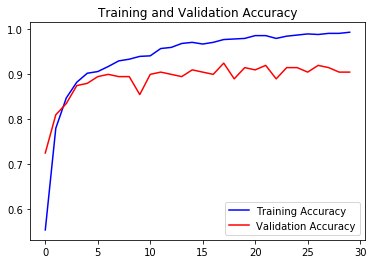

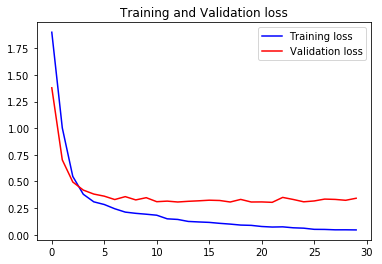

In [11]:
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Evaluating the classifier:
</div>

In [12]:
loss, accuracy = model.evaluate(x_train, y_train)
print('Accuracy on the training set: %.2f%%'%(accuracy * 100))

1000/1000 [==============================] - 0s 43us/step
Accuracy on the training set: 97.50%


In [13]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Accuracy on the test set: %.2f%%'%(accuracy * 100))

200/200 [==============================] - 0s 60us/step
Accuracy on the test set: 94.00%


<div class="alert">
<div style="direction:ltr;text-align:left;font-family:Tahoma; font-size:16pt"> Dropout
</div>
</div>

<img src="./images/dropout.png" alt="Dropout">
<a href="https://www.researchgate.net/profile/Amine_Ben_khalifa/publication/309206911/figure/fig3/AS:418379505651712@1476760855735/Dropout-neural-network-model-a-is-a-standard-neural-network-b-is-the-same-network.png">Reference</a>

<div style="direction:ltr;text-align:left;font-family: Tahoma">
Repeating the last procedures with <strong> Dropout</strong>:
</div>

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# A deeper model
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=25))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.75))
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train,
          epochs=30,
          batch_size=64, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/30
800/800 [==============================] - 0s 475us/step - loss: 2.2289 - acc: 0.1738 - val_loss: 1.9178 - val_acc: 0.7050
Epoch 2/30
800/800 [==============================] - 0s 74us/step - loss: 1.8612 - acc: 0.4437 - val_loss: 1.4986 - val_acc: 0.7400
Epoch 3/30
800/800 [==============================] - 0s 70us/step - loss: 1.4670 - acc: 0.5938 - val_loss: 1.0479 - val_acc: 0.7850
Epoch 4/30
800/800 [==============================] - 0s 71us/step - loss: 1.1204 - acc: 0.6863 - val_loss: 0.7340 - val_acc: 0.8300
Epoch 5/30
800/800 [==============================] - 0s 71us/step - loss: 0.9107 - acc: 0.7213 - val_loss: 0.5831 - val_acc: 0.8650
Epoch 6/30
800/800 [==============================] - 0s 72us/step - loss: 0.7913 - acc: 0.7587 - val_loss: 0.5031 - val_acc: 0.8700
Epoch 7/30
800/800 [==============================] - 0s 71us/step - loss: 0.6825 - acc: 0.7937 - val_loss: 0.4578 - val_acc: 0.8650
Epoch 8/30
800/800 [==

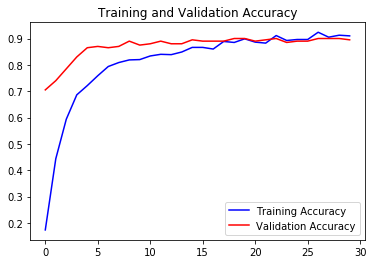

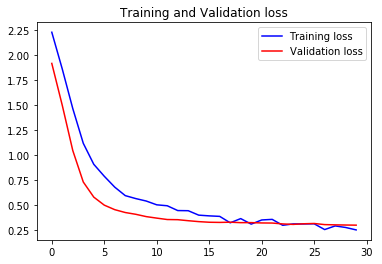

In [17]:
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [18]:
loss, accuracy = model.evaluate(x_train, y_train)
print('Accuracy on the training set: %.2f%%'%(accuracy * 100))

loss, accuracy = model.evaluate(x_test, y_test)
print('Accuracy on the test set: %.2f%%'%(accuracy * 100))

1000/1000 [==============================] - 0s 45us/step
Accuracy on the training set: 93.90%
200/200 [==============================] - 0s 45us/step
Accuracy on the test set: 93.00%


<div class="alert">
<div style="direction:ltr;text-align:left;font-family:B Tahoma"> Practical Deep Learning Course for Computer Vision
<br>Vahid Reza Khazaie<br>
</div>
<a href="https://www.linkedin.com/in/vahidrezakhazaie/">LinkedIn</a> - <a href="https://github.com/vrkh1996">GitHub</a>

</div>